### Forward dynamics of `Panda`

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mujoco_parser import MuJoCoParserClass
np.set_printoptions(precision=2)
plt.rc('xtick',labelsize=6); plt.rc('ytick',labelsize=6)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
print ("Ready.")

Ready.


### Parse `Panda` and plot 

Creating window glfw
Creating offscreen glfw


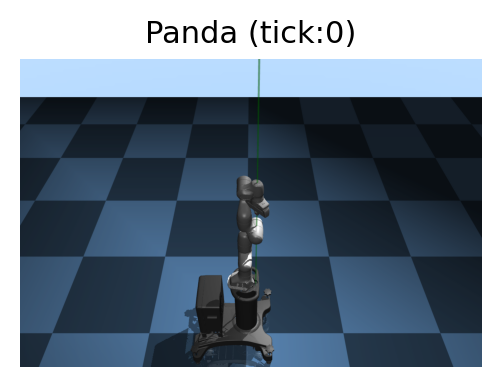

Done.


In [2]:
env = MuJoCoParserClass(name='Panda',xml_path='../asset/panda/franka_panda.xml')
env.plot_scene(figsize=(5,2),title_str='Panda (tick:%d)'%(env.tick),title_fs=11)
print ("Done.")

### Free-fall motion

In [3]:
env.init_viewer(window_width=0.3,window_height=0.3,
                cam_azimuth=80.0,cam_distance=3.0,
                cam_elevation=-30.0,cam_lookat=np.array([0,0,1.5]))
env.reset()
max_tick = 2000
sec_list = np.zeros(max_tick)
q_list   = np.zeros((max_tick,env.n_rev_joint))
while env.tick < max_tick:
    torque = np.zeros(env.n_rev_joint) # zero torque
    env.step(ctrl=torque,ctrl_idxs=env.rev_joint_idxs)
    env.render()
    # Append
    sec_list[env.tick-1] = env.get_sim_time()
    q_list[env.tick-1,:] = env.get_q_pos(q_pos_idxs=env.rev_joint_idxs)
print ("Done.")

Done.


In [4]:
env.print_viewer_info()

azimuth:[80.00] distance:[3.00] elevation:[-30.00] lookat:[0.00,0.00,1.50]


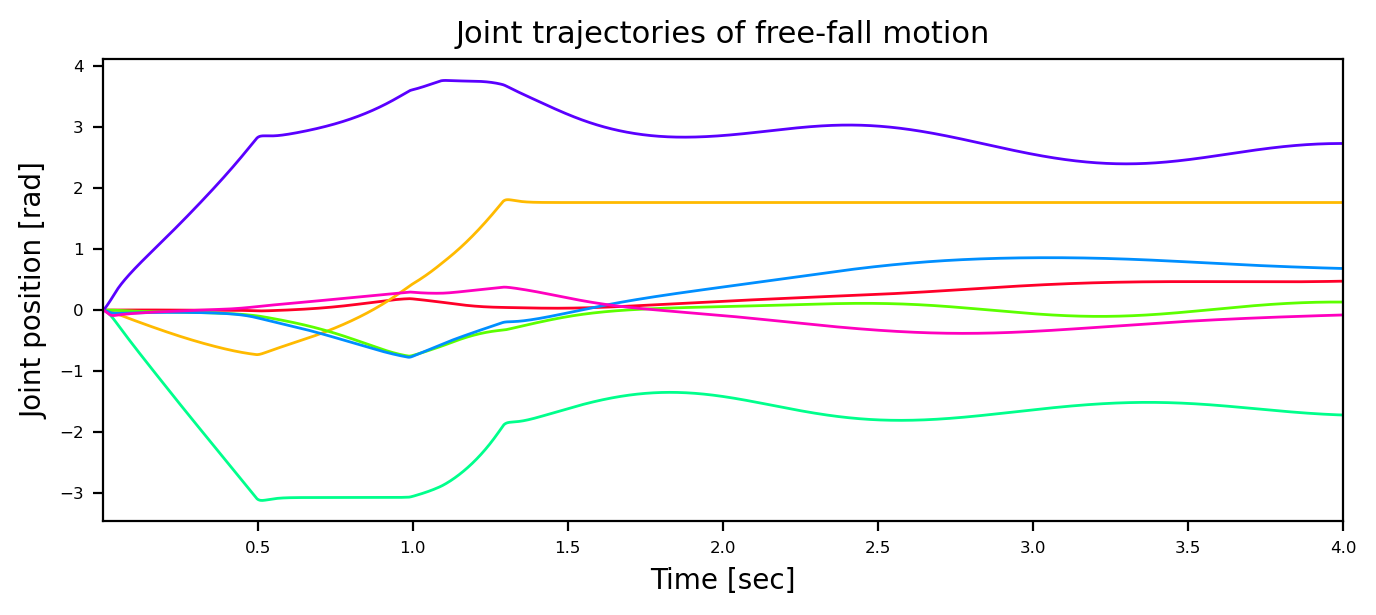

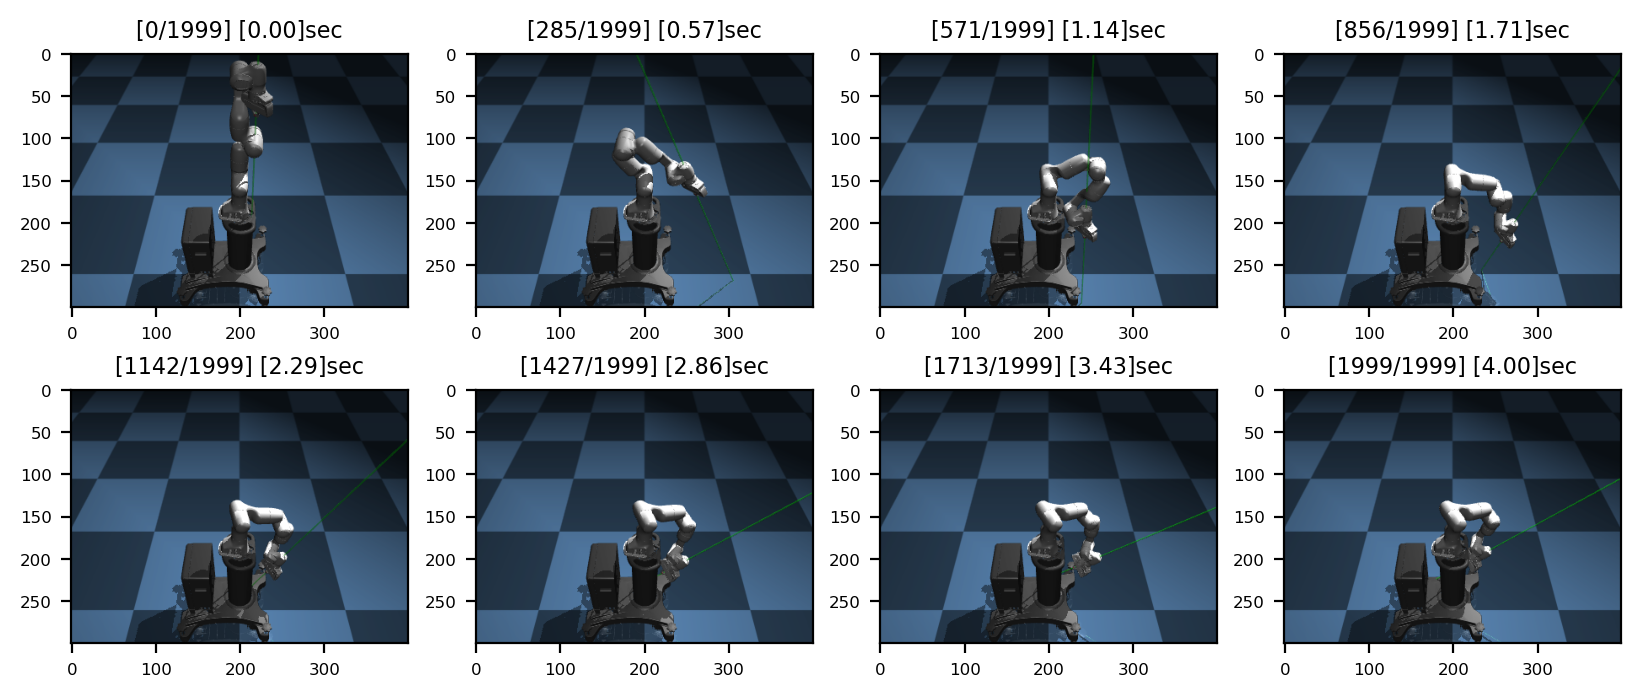

In [5]:
# Plot joint trajectories
cs = [plt.cm.gist_rainbow(x) for x in np.linspace(0,1,env.n_rev_joint)]
plt.figure(figsize=(8,3))
for j_idx in range(env.n_rev_joint):
    plt.plot(sec_list,q_list[:,j_idx],ls='-',color=cs[j_idx],lw=1)
plt.title('Joint trajectories of free-fall motion',fontsize=11)
plt.xlim(sec_list[0],sec_list[-1])
plt.xlabel('Time [sec]',fontsize=10)
plt.ylabel('Joint position [rad]',fontsize=10)
plt.show()
# Plot snapshots for Panda with FK
fig = plt.figure(figsize=(10,4))
for idx,tick in enumerate(np.linspace(0,max_tick-1,8).astype(np.int32)):
    env.forward(q_pos=q_list[tick,:],q_pos_idxs=env.rev_joint_idxs)
    img = env.plot_scene(render_w=400,render_h=300,
                         cam_distance=2.0,cam_elevation=-45,cam_lookat=[0,0,1.25],RETURN_IMG=True)
    ax = fig.add_subplot(2,4,idx+1)
    ax.imshow(img)
    ax.set_title('[%d/%d] [%.2f]sec'%(tick,max_tick-1,sec_list[tick]),fontsize=8)

### Apply external force on a body of `Panda`

In [6]:
env.init_viewer(window_width=0.3,window_height=0.3,
                cam_azimuth=80.0,cam_distance=3.0,
                cam_elevation=-30.0,cam_lookat=np.array([0,0,1.5]))
env.reset()
max_tick = 2000
sec_list = np.zeros(max_tick)
q_list   = np.zeros((max_tick,env.n_rev_joint))
while env.tick < max_tick:
    # Apply external force to a body
    body_name = 'panda_eef' # panda_eef / panda_link_4 / panda_link_5 / panda_link_6
    env.apply_xfrc(body_name=body_name,xfrc=np.array([0,0,100,0,0,0]))
    # Update
    torque = np.zeros(env.n_rev_joint) # zero torque
    env.step(ctrl=torque,ctrl_idxs=env.rev_joint_idxs)
    env.add_marker(env.get_p_body(body_name),radius=0.1,color=np.array([1,0,0,0.5])) # add marker
    env.render()
    # Append
    sec_list[env.tick-1] = env.get_sim_time()
    q_list[env.tick-1,:] = env.get_q_pos(q_pos_idxs=env.rev_joint_idxs)
print ("Done.")

Done.


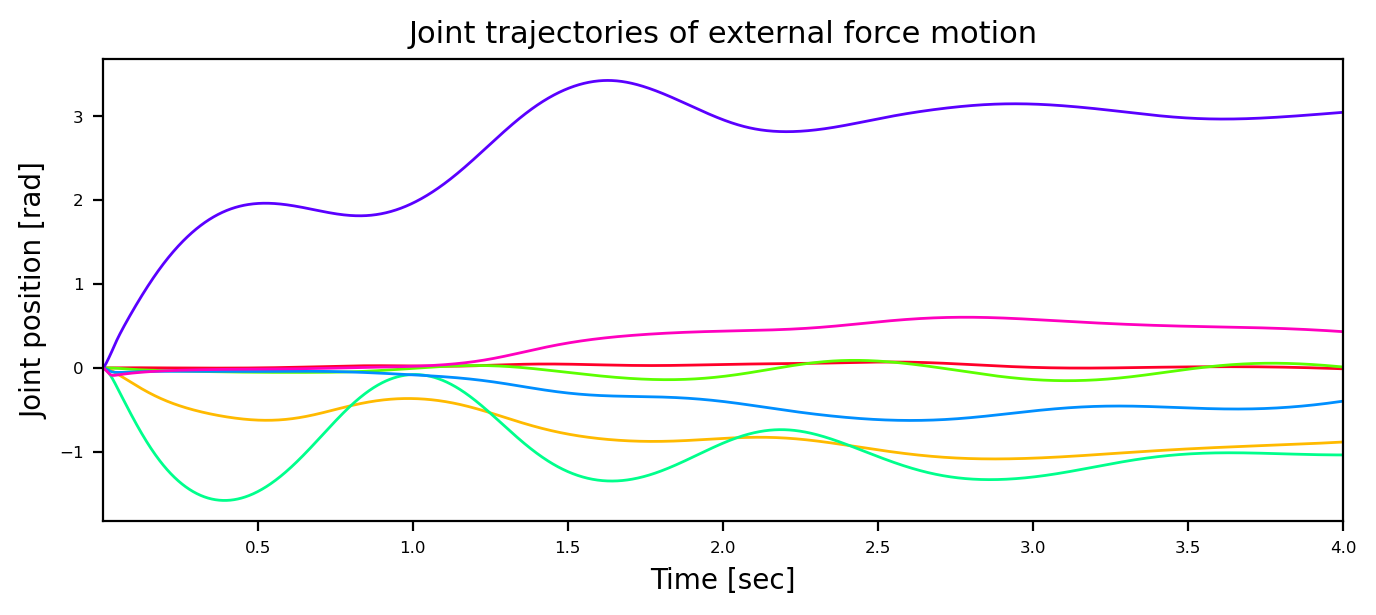

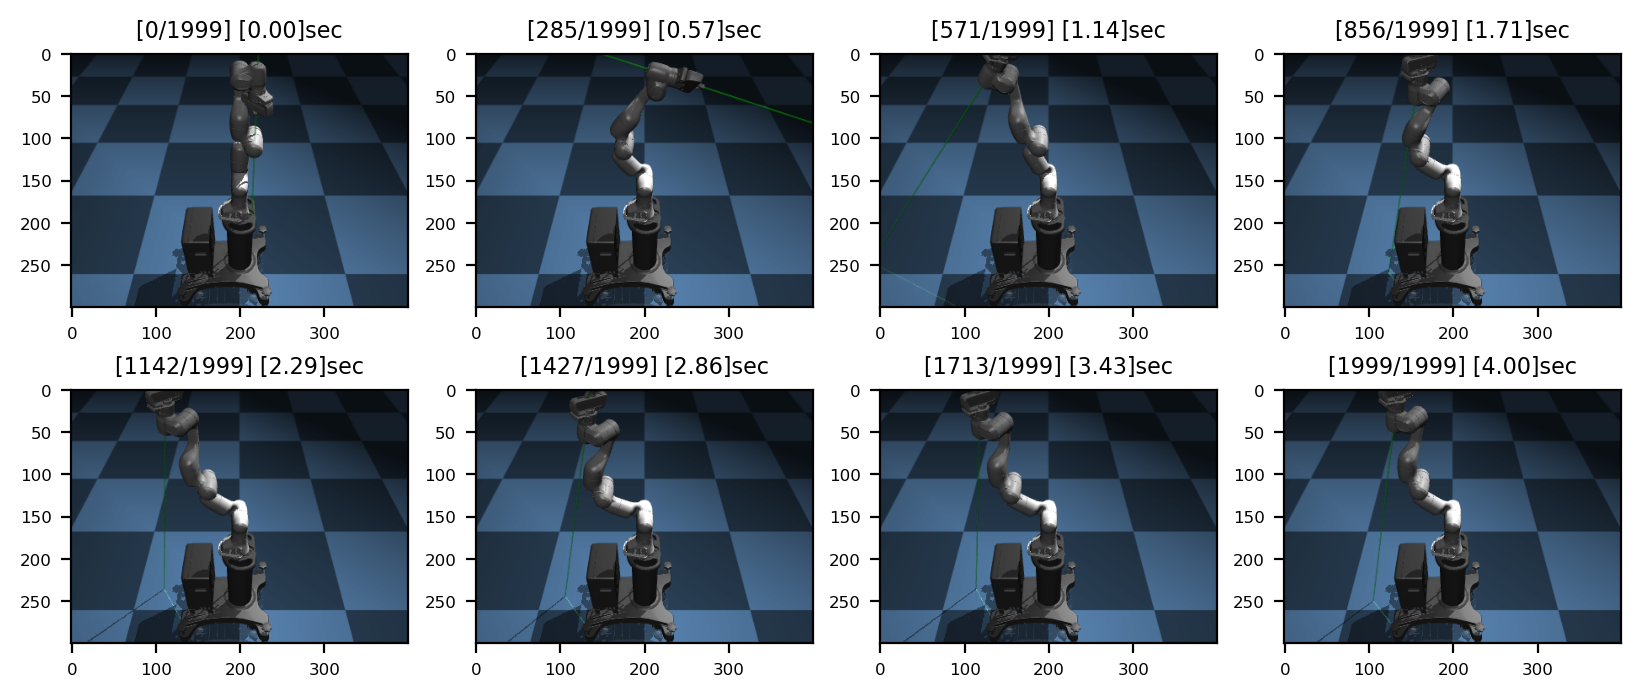

In [7]:
# Plot joint trajectories
cs = [plt.cm.gist_rainbow(x) for x in np.linspace(0,1,env.n_rev_joint)]
plt.figure(figsize=(8,3))
for j_idx in range(env.n_rev_joint):
    plt.plot(sec_list,q_list[:,j_idx],ls='-',color=cs[j_idx],lw=1)
plt.title('Joint trajectories of external force motion',fontsize=11)
plt.xlim(sec_list[0],sec_list[-1])
plt.xlabel('Time [sec]',fontsize=10)
plt.ylabel('Joint position [rad]',fontsize=10)
plt.show()
# Plot snapshots for Panda with FK
fig = plt.figure(figsize=(10,4))
for idx,tick in enumerate(np.linspace(0,max_tick-1,8).astype(np.int32)):
    env.forward(q_pos=q_list[tick,:],q_pos_idxs=env.rev_joint_idxs)
    img = env.plot_scene(render_w=400,render_h=300,
                         cam_distance=2.0,cam_elevation=-45,cam_lookat=[0,0,1.25],RETURN_IMG=True)
    ax = fig.add_subplot(2,4,idx+1)
    ax.imshow(img)
    ax.set_title('[%d/%d] [%.2f]sec'%(tick,max_tick-1,sec_list[tick]),fontsize=8)